In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Input threads is equal to or greater than ncores minus 1 (7)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 6.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'ArchR_multiomeATAC_DLPFC_neuron')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyX30")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-68be412a8802-Date-2021-09-22_Time-16-45-21.log
If there is an issue, please report to github with logFile!

2021-09-22 16:45:21 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



## Check clusters w/ lower nFrag (dead cells) and doublets

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-68be2bb92089-Date-2021-09-22_Time-16-46-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-68be2bb92089-Date-2021-09-22_Time-16-46-25.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-68be3edb2cac-Date-2021-09-22_Time-16-46-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-68be3edb2cac-Date-2021-09-22_Time-16-46-26.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-68be5cc487d2-Date-2021-09-22_Time-16-46-30.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : Arch

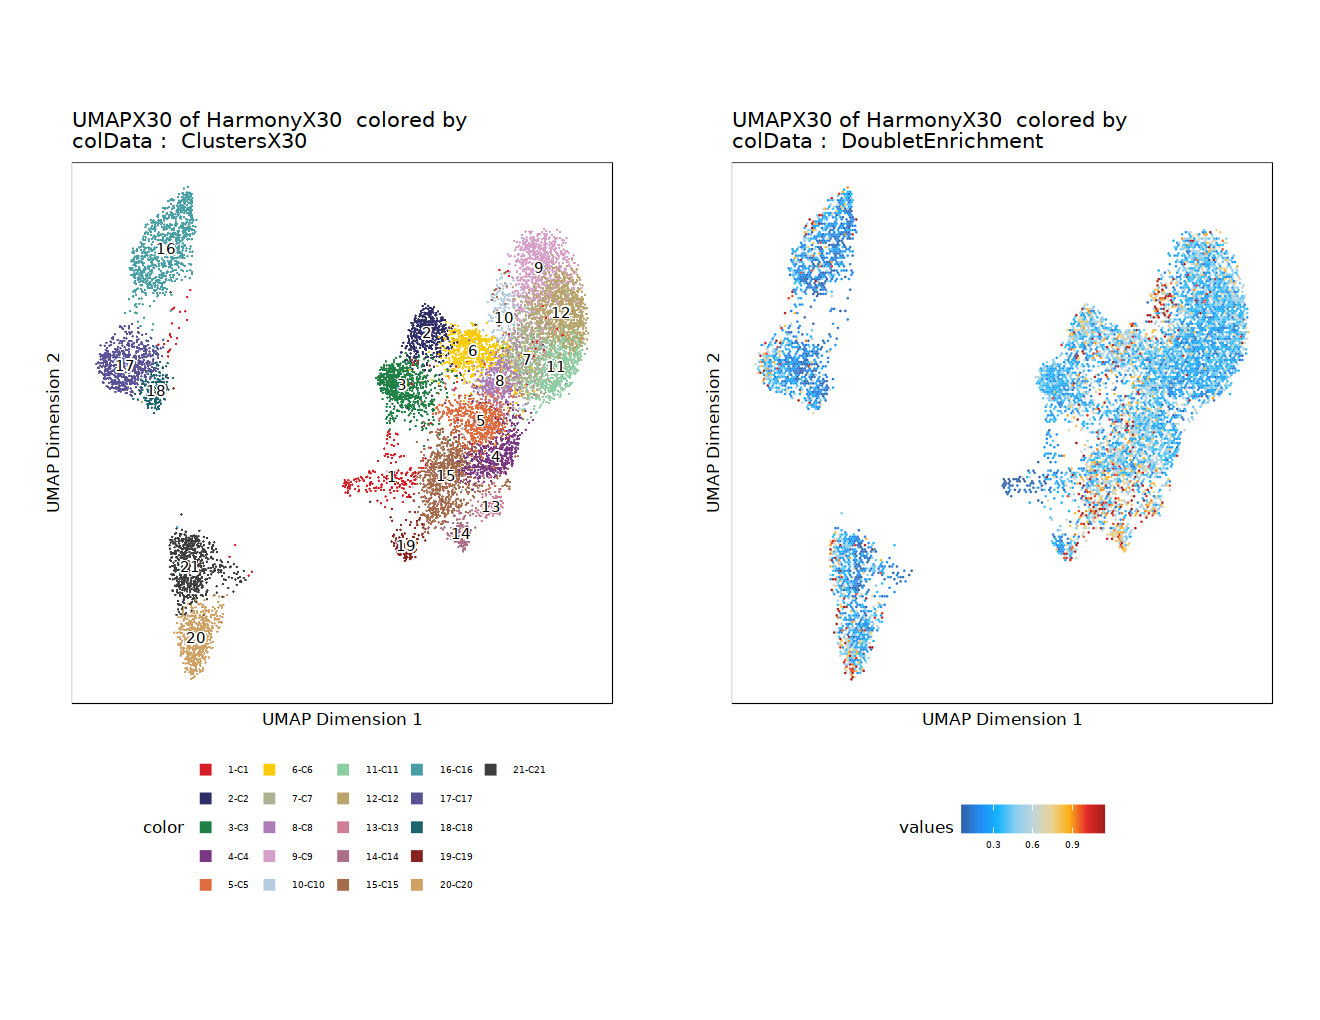

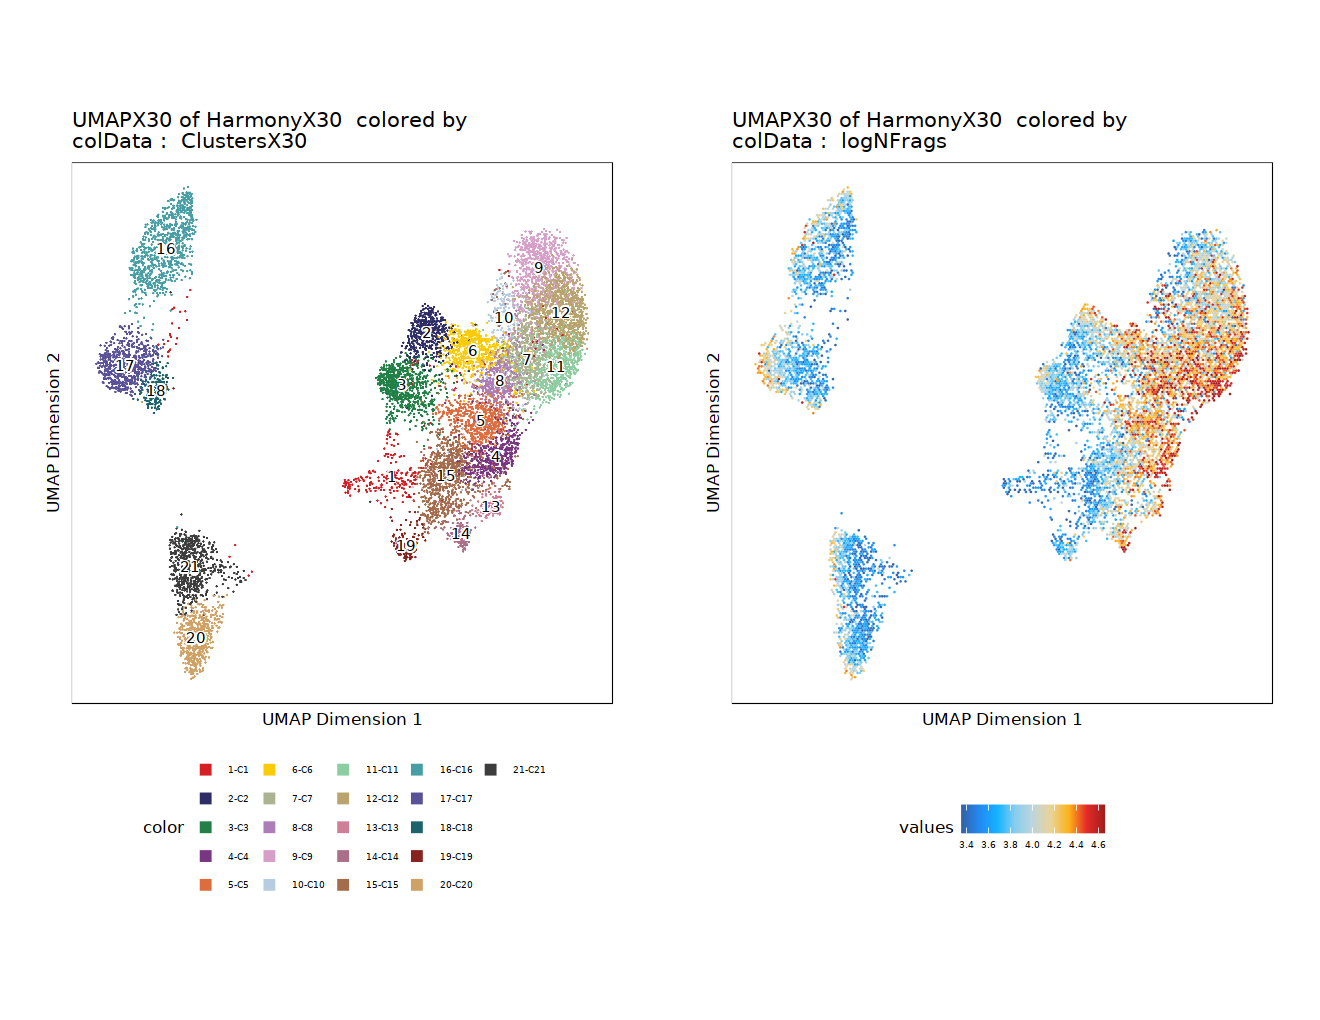

In [6]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersX30", embedding = "UMAPX30")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPX30")
ggAlignPlots(p1, p2, type = "h")


proj$logNFrags = log10(proj$nFrags)
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPX30")
ggAlignPlots(p1, p3, type = "h")

# Integrate with snRNA-seq from neuronal cell types

In [8]:
SETDIR='../../../data/tidy_data/rdas/JH_PFC_LabeledNuclei_20210827'
rna_sce = readRDS(file.path(SETDIR,'neuron_final.sce.rds'))

In [14]:
colData(rna_sce)$cell_type[colData(rna_sce)$cell_type == 'PVALB 1'] = 'PVALB BC'
colData(rna_sce)$cell_type[colData(rna_sce)$cell_type == 'PVALB 2'] = 'PVALB ChC'

colData(rna_sce)$cell_type2 = gsub(' [1-3]$','', colData(rna_sce)$cell_type)
head(colData(rna_sce))
table(colData(rna_sce)$cell_type2)
logcounts(rna_sce) = NULL

DataFrame with 6 rows and 18 columns
                               batch   cell_id     sample_names      monkey
                         <character> <integer>      <character> <character>
EXC_AAACCCAAGCCTCAGC-1-0           0         1 Monkey_O_sample1    Monkey_O
EXC_AAACCCATCGGAAACG-1-0           0         6 Monkey_O_sample1    Monkey_O
EXC_AAACCCATCTCTCGAC-1-0           0         7 Monkey_O_sample1    Monkey_O
EXC_AAACGAAAGACCAGAC-1-0           0         8 Monkey_O_sample1    Monkey_O
EXC_AAACGAACAATAGGGC-1-0           0        11 Monkey_O_sample1    Monkey_O
EXC_AAACGAACATAGAATG-1-0           0        12 Monkey_O_sample1    Monkey_O
                           n_genes percent.mt       nCount_RNA
                         <integer>  <numeric>        <numeric>
EXC_AAACCCAAGCCTCAGC-1-0      4250          0 11288.5185539108
EXC_AAACCCATCGGAAACG-1-0      3692          0 9293.04299024493
EXC_AAACCCATCTCTCGAC-1-0      3771          0 8764.49109520612
EXC_AAACGAAAGACCAGAC-1-0      4412      


L2 CUX2+ MEIS2+  L3 CUX2+ RORB+         L4 ALPL          L4 TYR      L4/5 TBX15 
           6159            1490            3369            1280            2260 
        L5 PCP4       L5 POU3F1      L5/6 NR4A2        L6 ITGA8         L6 NKD1 
            648             189             333            1464             825 
        L6 SYT6           LAMP5            NDNF        PVALB BC       PVALB ChC 
            731             628             663            1734             430 
            SST              TH             VIP 
           2227             142            1392 

In [15]:
###################################################################
# split the cells in snATAC and snRNA by Excitatory and Inhibitory
groupList <- SimpleList(
  Monkey1_EXC = SimpleList(
      # Group by Excitatory neurons
        ATAC = proj$cellNames[grepl('EXC', as.character(proj$Celltype1)) ],
        RNA = colnames(rna_sce)[grepl('Excita_neurons', colData(rna_sce)$cell_class)]
      ),
        # Group by Interneurons neurons
        Monkey1_INH = SimpleList(
        ATAC = proj$cellNames[grepl('INH', proj$Celltype1) ],
        RNA = colnames(rna_sce)[grepl('Interneurons', colData(rna_sce)$cell_class)]
      )
)

In [21]:
#####################################
# integration split by tissue region
proj <- addGeneIntegrationMatrix(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "HarmonyX30",
    seRNA = rna_sce,  nGenes = 2000, 
    addToArrow = FALSE, plotUMAP = FALSE,
    groupList = groupList,
    groupRNA = "cell_type2",
    nameCell = "predictedCell_RNA2ATACCo",
    nameGroup = "predictedGroup_RNA2ATACCo",
    nameScore = "predictedScore_RNA2ATACCo"
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-68beeb7a524-Date-2021-09-22_Time-17-34-53.log
If there is an issue, please report to github with logFile!

2021-09-22 17:34:55 : Running Seurat's Integration Stuart* et al 2019, 0.023 mins elapsed.

2021-09-22 17:34:56 : Checking ATAC Input, 0.043 mins elapsed.

2021-09-22 17:34:56 : Checking RNA Input, 0.047 mins elapsed.

2021-09-22 17:35:25 : Found 17680 overlapping gene names from gene scores and rna matrix!, 0.531 mins elapsed.

2021-09-22 17:35:25 : Creating Integration Blocks, 0.531 mins elapsed.

2021-09-22 17:35:25 : Prepping Interation Data, 0.534 mins elapsed.

2021-09-22 17:35:26 : Computing Integration in 2 Integration Blocks!, 0 mins elapsed.

2021-09-22 17:43:34 : Completed Integration with RNA Matrix, 8.134 mins elapsed.

Overriding previous entry for predictedCell_RNA2ATACCo

Overriding previous entry for predictedGroup_RNA2ATACCo

Overriding previous entry for predictedScore_RNA2ATACCo

ArchR logging successf

# Compare snATAC clusters w/ snRNA clusters

preClust,
L5 PCP4,C1
L2 CUX2+ MEIS2+,C10
L2 CUX2+ MEIS2+,C11
L2 CUX2+ MEIS2+,C12
L5/6 NR4A2,C13
L6 NKD1,C14
L4 ALPL,C15
SST,C16
PVALB BC,C17
PVALB ChC,C18


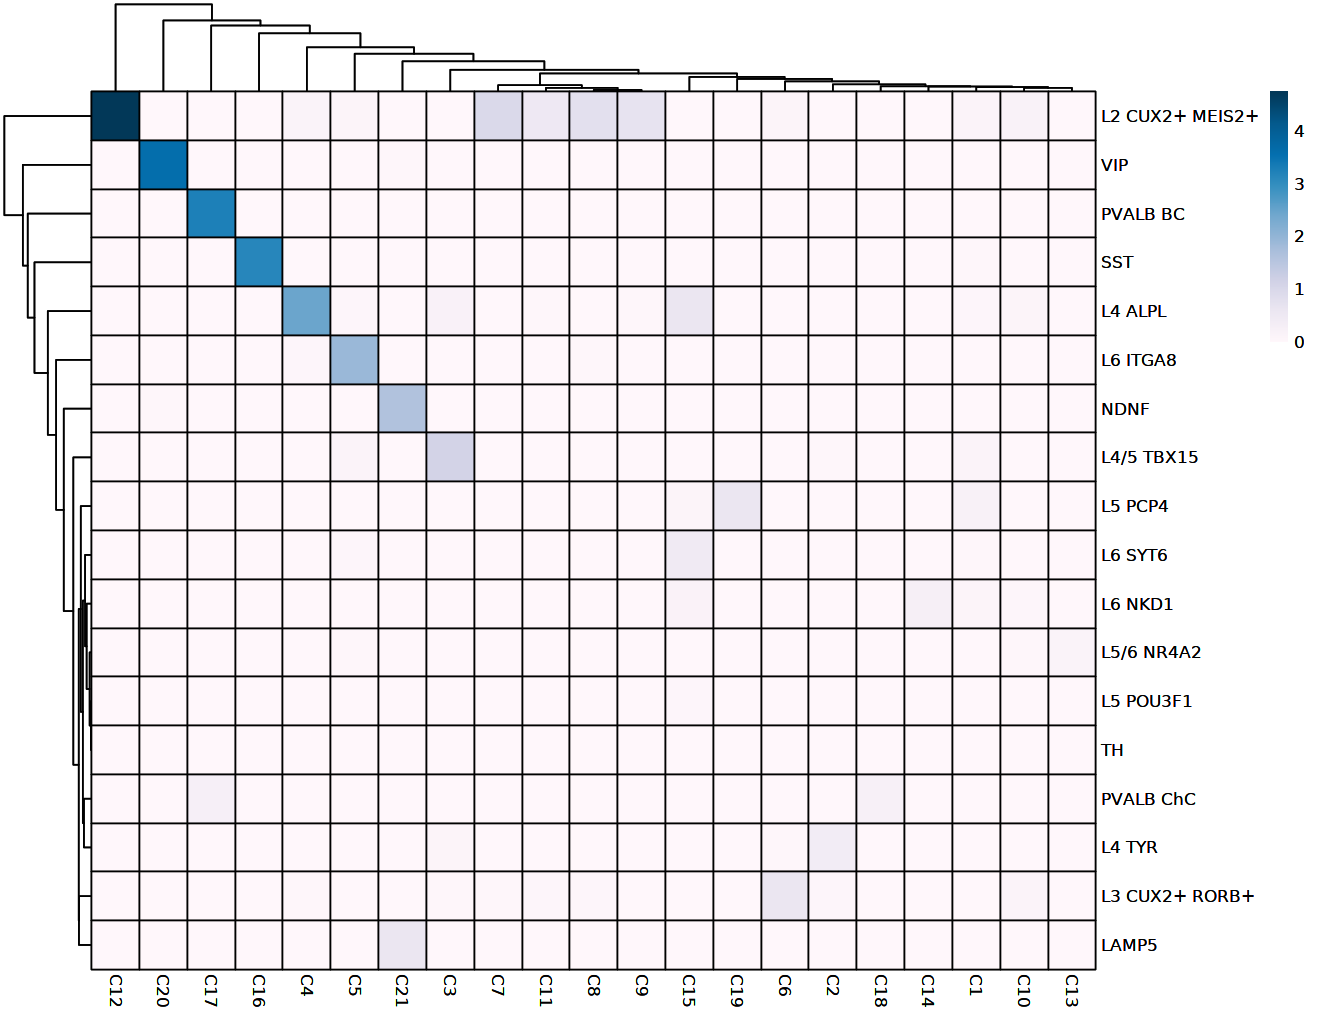

In [22]:
# plot the confusion matrix of cell types by predicted cell type clusters
cM <- confusionMatrix(paste0(proj$predictedGroup_RNA2ATACCo), paste0(proj$ClustersX30))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

preClust <- rownames(cM)[apply(cM, 2 , which.max)]
cbind(preClust, colnames(cM)) #Assignments

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-68be7f5aeb3e-Date-2021-09-22_Time-17-43-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-68be7f5aeb3e-Date-2021-09-22_Time-17-43-35.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-68be30822d13-Date-2021-09-22_Time-17-43-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-68be30822d13-Date-2021-09-22_Time-17-43-36.log



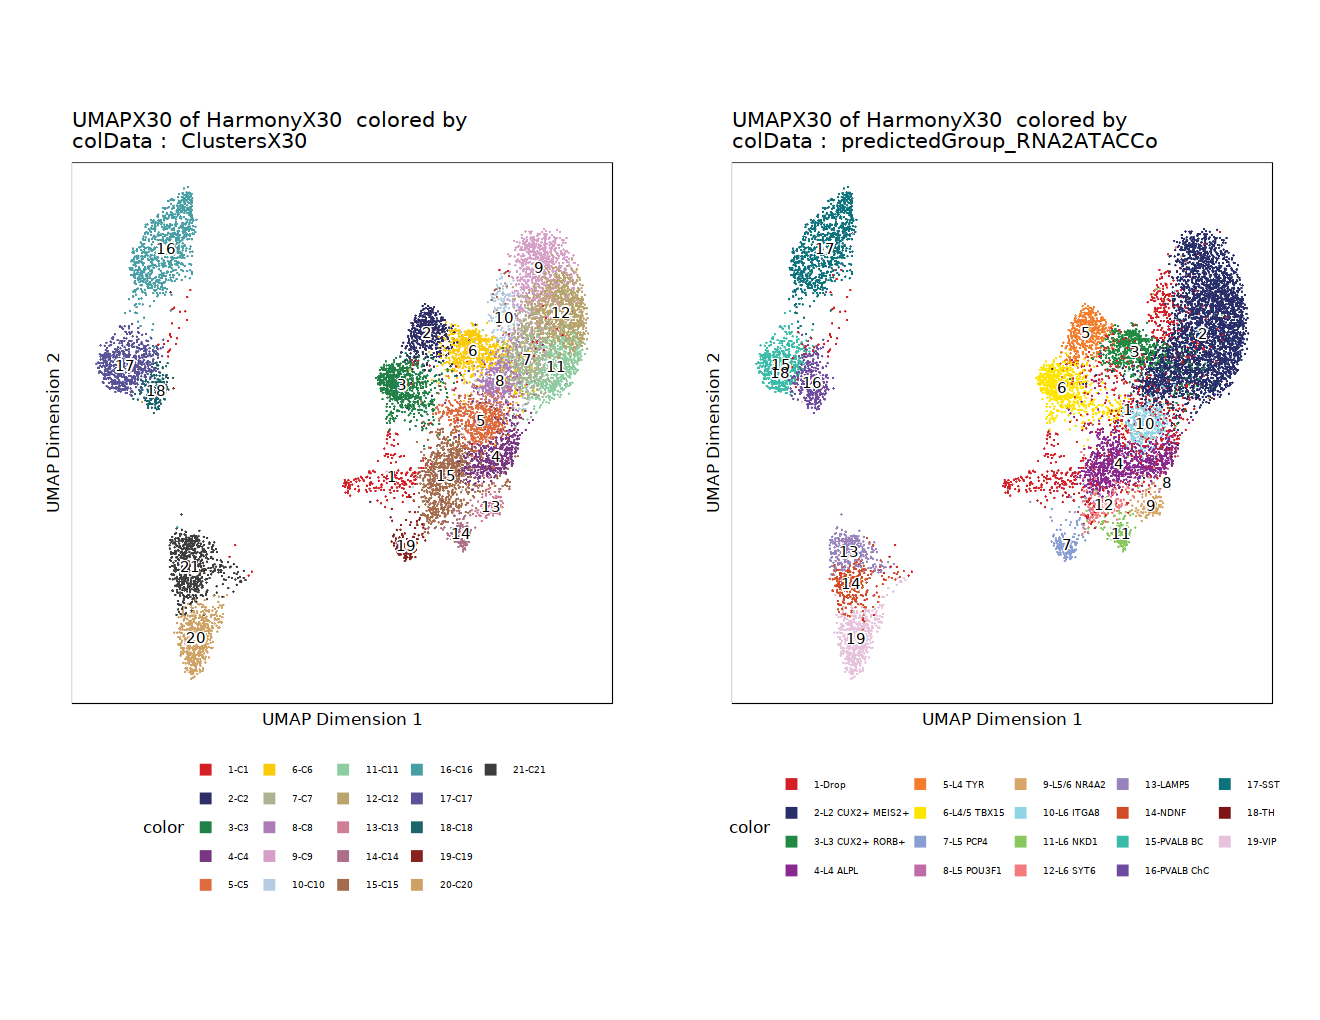

In [23]:
## rename the junk cluster and doublet cluster
indDrop = which(proj$ClustersX30 %in% c('C1','C10') | 
               proj$predictedScore_RNA2ATACCo < 0.5 )
proj$predictedGroup_RNA2ATACCo[indDrop] = 'Drop'

p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX30")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "ClustersX30", embedding = "UMAPX30")

ggAlignPlots(p3, p2, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-68be4cd40659-Date-2021-09-22_Time-17-55-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-09-22 17:55:40 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-68be4cd40659-Date-2021-09-22_Time-17-55-37.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated

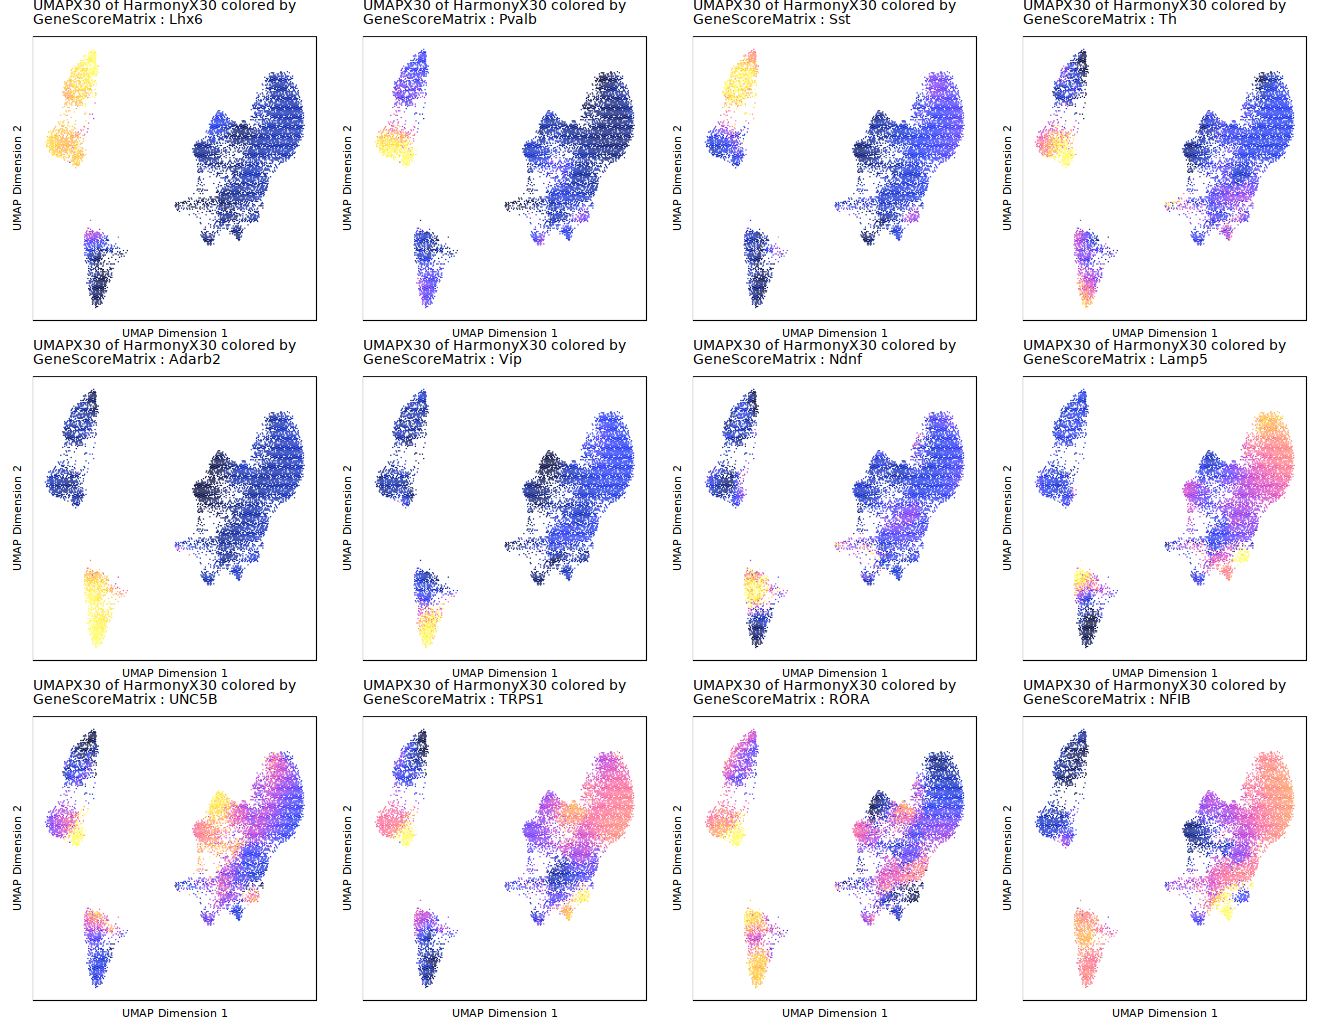

In [24]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Sst', 'Th', # MGE markers
                    'Adarb2', 'Vip', 'Ndnf', 'Lamp5', # CGE markers
                  'UNC5B', 'TRPS1', 'RORA', 'NFIB') # Chandelier markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX30")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 3),p))

In [26]:
table(proj$predictedGroup_RNA2ATACCo)
proj = saveArchRProject(ArchRProj = proj)


           Drop L2 CUX2+ MEIS2+  L3 CUX2+ RORB+         L4 ALPL          L4 TYR 
           1034            3470             610             925             458 
     L4/5 TBX15         L5 PCP4       L5 POU3F1      L5/6 NR4A2        L6 ITGA8 
            727             185              17             137             412 
        L6 NKD1         L6 SYT6           LAMP5            NDNF        PVALB BC 
            157             200             311             290             547 
      PVALB ChC             SST              TH             VIP 
            320             869               2             538 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         